Q1:Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States

Assualt- Assualt rate in different places of United States

UrbanPop - urban population in different places of United States

Rape - Rape rate in different places of United States


In [137]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch  # For Dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [138]:
#importing warnings to ignore warningd
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [139]:
#Load the dataset
crime=pd.read_csv('crime_data.csv')
crime

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [140]:
#check shape of data
crime.shape

(50, 5)

# EDA

In [141]:
#information about data
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Place     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [142]:
# check null values
crime.isnull().sum()

Place       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [143]:
#it give best  Descriptive Statistics
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [144]:
#Checking duplicated Rows
crime[crime.duplicated()].sum()

Place       0.0
Murder      0.0
Assault     0.0
UrbanPop    0.0
Rape        0.0
dtype: float64

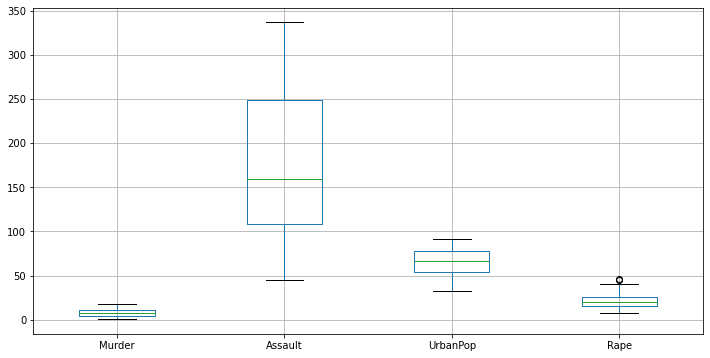

In [145]:
# check outliers using boxplot
crime.boxplot(figsize=(12,6));
plt.show()

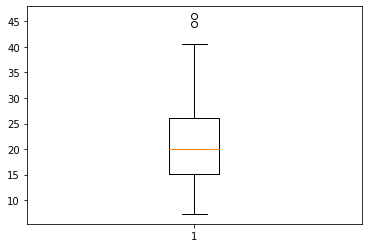

In [146]:
box=plt.boxplot(crime['Rape'])
plt.show();

In [147]:
# Extracting outlier value
[x.get_ydata() for x in box['fliers']]

[array([44.5, 46. ])]

In [149]:
# deleting outliers
crime=crime[crime['Rape'] != 44.5]
crime=crime[crime['Rape'] != 46]

# Hierarchical clustering

In [96]:
#Normalize the data using Normalization Function- Standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [97]:
crime.columns[1:]

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [98]:
#crime.columns
crime.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8
10,5.3,46,83,20.2


In [99]:
#normalize the data
crime_scale=pd.DataFrame(scaler.fit_transform(crime.iloc[:,1:]),columns=crime.columns[1:])


In [100]:
crime_scale.head()

,Murder,Assault,UrbanPop,Rape
0,1.278681,0.837320,-0.532911,0.120627
1,0.103677,1.542644,1.013117,1.340909
2,0.264952,0.277924,-1.095104,-0.091054
3,0.311030,1.323751,1.786132,2.536287
4,0.057598,0.448175,0.872569,2.299701


In [101]:
crime_scale.shape

(48, 4)

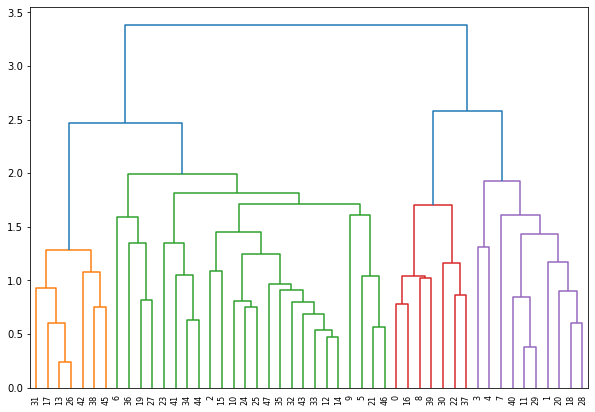

In [102]:
#Plot the hierarchical clustering as a dendrogram.
plt.figure(figsize=(10, 7))
Dendrogram=sch.dendrogram(sch.linkage(crime_scale,method='average'))

In [103]:
#perform hierachical clustering(Agglomarative)
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='average')
hc

AgglomerativeClustering(linkage='average')

In [104]:
y_hc=hc.fit_predict(crime_scale)
y_hc


array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [105]:
#make dataframe and attached clusterId column
crime['h_ClusterId']=pd.DataFrame(y_hc,columns=['h_ClusterId'])
crime

,Place,Murder,Assault,UrbanPop,Rape,h_ClusterId
0,Alabama,13.2,236,58,21.2,0.0
2,Arizona,8.1,294,80,31.0,1.0
3,Arkansas,8.8,190,50,19.5,0.0
4,California,9.0,276,91,40.6,0.0
5,Colorado,7.9,204,78,38.7,1.0
6,Connecticut,3.3,110,77,11.1,1.0
7,Delaware,5.9,238,72,15.8,0.0
8,Florida,15.4,335,80,31.9,0.0
9,Georgia,17.4,211,60,25.8,1.0
10,Hawaii,5.3,46,83,20.2,1.0


In [106]:
#Apply Groupby on the dataframe & count mean
crime.groupby('h_ClusterId').agg(['mean']).reset_index()

C:\Users\sarve\AppData\Local\Temp\ipykernel_9820\4294501451.py:2: FutureWarning:

['Place'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,h_ClusterId,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0.0,7.450000,173.750000,64.9375,19.318750
1,1.0,7.953333,167.633333,66.1000,21.186667


Conclusion:
    
    We have got 2 hierarchial clustering 
    
    This places which has maximum crime rate are in 1st cluster (clusterId=0).
    
    This places which has minimum crime rate are in 2nd cluster (clusterId=1).

In [107]:
#checking silhouette score for Hierarchical Clustering
silhouette_score(crime_scale,y_hc)


0.3998463950346378

 AT 2 CLUSTER SILHOUTTE SCORE IS GOOD.

# K-Means Clustering

In [108]:
#importing library for k-means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [109]:
crime_k=pd.read_csv('crime_data.csv')

In [110]:
crime_k.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [111]:
#Normalize the data using Normalization Function- Standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [112]:
crime_k.columns[1:]

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [113]:
#normalize the data
crk_scaled=pd.DataFrame(scaler.fit_transform(crime_k.iloc[:,1:]),columns=crime_k.columns[1:])

In [114]:
crk_scaled.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814



In Hierarchical clustering we don't have any function to decide best number of clusters.

But, in KMeans clustering with the help of Elbow Method we can decide best number of clusters.

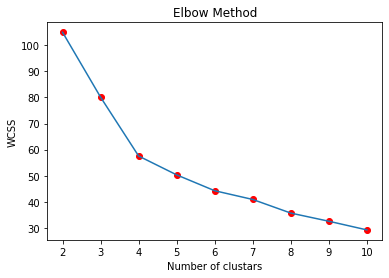

In [115]:
#perform KMeans clustering
#plot Elbow Chart to decide best number of clusters.
wcss=[]
for i in range (2,11):
    Kmeans=KMeans(n_clusters=i,random_state=42)
    Kmeans.fit(crk_scaled)
    wcss.append(Kmeans.inertia_)
    
plt.plot(range(2,11),wcss) 
plt.scatter(range(2,11), wcss, color = "red")
plt.title('Elbow Method')
plt.xlabel('Number of clustars')
plt.ylabel('WCSS')
plt.show()

As from Elbow Chart we conclude that 4 numbers of clusters are best.

In [116]:
#within cluster sum of squared
wcss

[104.96163315756871,
 80.08569526137276,
 57.55425863091105,
 50.33327385184907,
 44.259807638112314,
 40.912667222473445,
 35.69587706333373,
 32.57509993011513,
 29.253498916734603]

In [117]:
# selecting 4 clusters from above scree plot
Kmeans=KMeans(n_clusters=4)
Kmeans=Kmeans.fit_predict(crimek_scaled)
Kmeans

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [118]:
#make dataframe and attached clusterId column
crime_k['k_ClusterId']=pd.DataFrame(Kmeans,columns=['k_ClusterId'])
crime_k

,Place,Murder,Assault,UrbanPop,Rape,k_ClusterId
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [119]:
#Aply Groupby on dataframe and count mean
crime_k.groupby('k_ClusterId').agg(['mean']).reset_index()

C:\Users\sarve\AppData\Local\Temp\ipykernel_9820\166751945.py:2: FutureWarning:

['Place'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,k_ClusterId,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,10.815385,257.384615,76.000000,33.192308
2,2,5.656250,138.875000,73.875000,18.781250
3,3,13.937500,243.625000,53.750000,21.412500


Conclusion:
    
    In KMeans we have 4 clusters.
    
    The places which has maximum crime are in 1st cluster (clusterId=0).
    
    The places which has minimum crime rate are in 3rd cluster (clusterId=2).

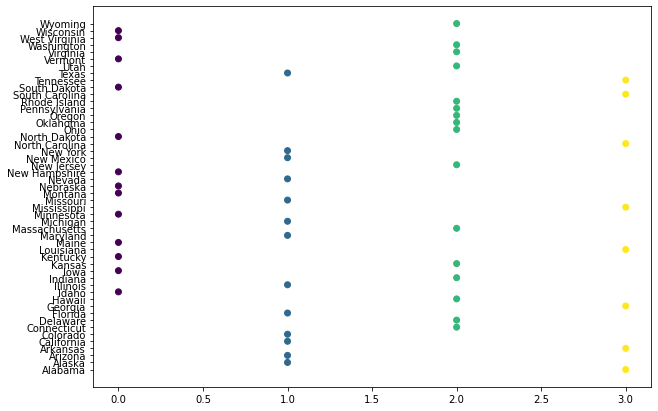

In [120]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime_k['k_ClusterId'],crime_k['Place'], c=Kmeans) 

In [121]:
#checking silhouette score for Hierarchical Clustering
silhouette_score(crk_scaled,Kmeans)

0.33968891433344395

# DBSCAN

In [122]:
#import library for DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [123]:
#load the dataset
crime_d=pd.read_csv('crime_data.csv')

In [124]:
#check firts 5 rows
crime_d.head()

,Place,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


<AxesSubplot:>

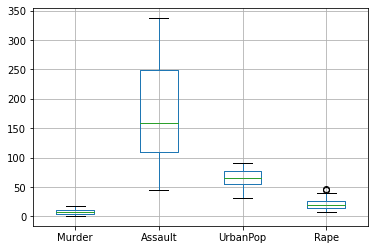

In [125]:
#make a boxplot to check noisy points (outliers)
crime_d.boxplot()

In [126]:
crime_d.columns[1:]

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [127]:
#convert into arrays.(.values)
array=crime_d.values[:,1:]

In [128]:
array

array([[13.2, 236, 58, 21.2],
       [10.0, 263, 48, 44.5],
       [8.1, 294, 80, 31.0],
       [8.8, 190, 50, 19.5],
       [9.0, 276, 91, 40.6],
       [7.9, 204, 78, 38.7],
       [3.3, 110, 77, 11.1],
       [5.9, 238, 72, 15.8],
       [15.4, 335, 80, 31.9],
       [17.4, 211, 60, 25.8],
       [5.3, 46, 83, 20.2],
       [2.6, 120, 54, 14.2],
       [10.4, 249, 83, 24.0],
       [7.2, 113, 65, 21.0],
       [2.2, 56, 57, 11.3],
       [6.0, 115, 66, 18.0],
       [9.7, 109, 52, 16.3],
       [15.4, 249, 66, 22.2],
       [2.1, 83, 51, 7.8],
       [11.3, 300, 67, 27.8],
       [4.4, 149, 85, 16.3],
       [12.1, 255, 74, 35.1],
       [2.7, 72, 66, 14.9],
       [16.1, 259, 44, 17.1],
       [9.0, 178, 70, 28.2],
       [6.0, 109, 53, 16.4],
       [4.3, 102, 62, 16.5],
       [12.2, 252, 81, 46.0],
       [2.1, 57, 56, 9.5],
       [7.4, 159, 89, 18.8],
       [11.4, 285, 70, 32.1],
       [11.1, 254, 86, 26.1],
       [13.0, 337, 45, 16.1],
       [0.8, 45, 44, 7.3],
       [7.

In [129]:
#Normalize the data using Normalization Function- Standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(array)
X = scaler.transform(array)



In [130]:
#perform DBSCAN clustering
dbscan = DBSCAN(eps=1.1, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=1.1)

In [131]:
dbscan.labels_

array([-1, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [132]:
#make dataframe and attached clusterId column
crime_d['d_ClusterId']=pd.DataFrame(dbscan.labels_,columns=['d_ClusterId'])
crime_d

,Place,Murder,Assault,UrbanPop,Rape,d_ClusterId
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


In [133]:
#Aply Groupby on the dataframe and count mean
crime_d.groupby('d_ClusterId').agg(['mean']).reset_index()

C:\Users\sarve\AppData\Local\Temp\ipykernel_9820\2795011430.py:2: FutureWarning:

['Place'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



,d_ClusterId,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,12.010000,258.250000,68.500000,28.545000
1,0,4.973333,112.433333,63.566667,16.356667


Text(0.5, 0, 'd_ClusterId')

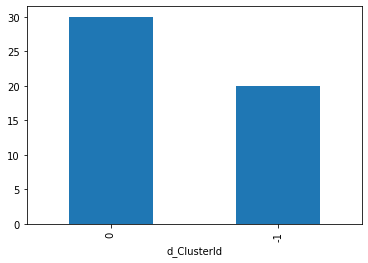

In [134]:
#barplot of clusterID
crime_d["d_ClusterId"].value_counts().plot.bar()
plt.xlabel('d_ClusterId')

Conclusion:
    
    In DBSCAN we have 2 clusters.
    
    clusterId=-1 has noisy records (outliers) & places which has maximum crime rate are in this cluster .
    
    The places which has minimum crime rate are in 2nd cluster (clusterId=0).

In [135]:
#Checking silhouette score
silhouette_score(array,dbscan.labels_)

0.5892954376969437

#### the Silhouette score lies from -1 to 1.

#### With -1 being the worst score in data.
#  we have possible 1 being the best sore.

#### Silhouette score of 0 suggest overlaping of clusters.